In [3]:
import hytools as ht
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
os.getcwd()

'/home/jovyan/data-store/cross-sensor-cal'

In [23]:
envi_image= 'export/NEON_D13_NIWO_DP1_20170904_181819_reflectance__corrected_0'

#anc_data = {'path_length': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 0],
# 'sensor_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 1],
# 'sensor_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 2],
# 'solar_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 3],
# 'solar_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 4],
# 'phase': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 5],
# 'slope': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 6],
# 'aspect': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 7],
# 'cosine_i': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 8],
# 'utc_time': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 9]}

envi = ht.HyTools()
envi.read_file(envi_image,'envi')


In [34]:
mask_image= 'export/NEON_D13_NIWO_DP1_20170904_181819_reflectance'

#anc_data = {'path_length': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 0],
# 'sensor_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 1],
# 'sensor_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 2],
# 'solar_az': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 3],
# 'solar_zn': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 4],
# 'phase': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 5],
# 'slope': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 6],
# 'aspect': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 7],
# 'cosine_i': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 8],
# 'utc_time': ['/data/yose/f130612t01p00r10rdn_e_obs_ort_clip', 9]}

og_envi = ht.HyTools()
og_envi.read_file(mask_image,'envi')






In [40]:
line = envi.get_line(100, corrections = [])
band = envi.get_band(40)
wave = envi.get_wave(660)
pixel = envi.get_pixels([500],[500])
#anc = envi.get_anc('sensor_zn',radians =False)

In [36]:
band

memmap([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        ...,
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
        [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
       dtype=float32)

In [44]:
line = og_envi.get_line(100, corrections = [])
band = og_envi.get_band(40)
wave = og_envi.get_wave(660)
pixel = og_envi.get_pixels([500],[500])

In [45]:
band

memmap([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

In [46]:
band = np.copy(band)
band[~og_envi.mask['no_data']] = np.nan
plt.matshow(band)

ValueError: cannot convert float NaN to integer

In [26]:
topo_coeffs = 'export/NEON_D13_NIWO_DP1_20170904_181819_reflectance_topo_coeffs__corrected_0.json'
envi.load_coeffs(topo_coeffs,'topo')

brdf_coeffs = 'export/NEON_D13_NIWO_DP1_20170904_181819_reflectance_brdf_coeffs__corrected_0.json'
envi.load_coeffs(brdf_coeffs,'brdf')

In [12]:
#print(envi.brdf)
#print(envi.topo)

In [32]:
envi.get_wave(660,corrections= ['brdf'])

TypeError: 'NoneType' object is not subscriptable

In [15]:
def show_rgb(hy_obj,r=660,g=550,b=440, correct= []):

    rgb=  np.stack([hy_obj.get_wave(r,corrections= correct),
                    hy_obj.get_wave(g,corrections= correct),
                    hy_obj.get_wave(b,corrections= correct)])
    rgb = np.moveaxis(rgb,0,-1).astype(float)
    rgb[rgb ==hy_obj.no_data] = np.nan

    bottom = np.nanpercentile(rgb,5,axis = (0,1))
    top = np.nanpercentile(rgb,95,axis = (0,1))
    rgb = np.clip(rgb,bottom,top)

    rgb = (rgb-np.nanmin(rgb,axis=(0,1)))/(np.nanmax(rgb,axis= (0,1))-np.nanmin(rgb,axis= (0,1)))

    height = int(hy_obj.lines/hy_obj.columns)

    fig  = plt.figure(figsize = (7,7) )
    plt.imshow(rgb)
    plt.show()
    plt.close()
    


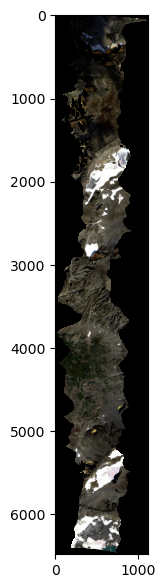

In [49]:
show_rgb(envi, correct= [])

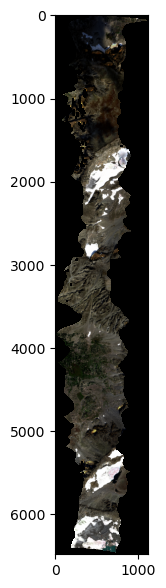

In [51]:
show_rgb(og_envi)

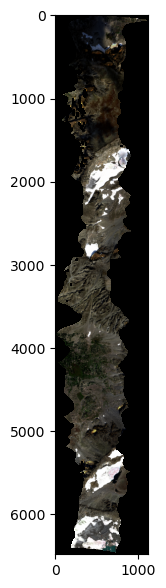

In [52]:
show_rgb(og_envi, correct = ['brdf'])

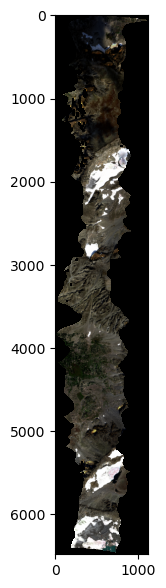

In [53]:
show_rgb(og_envi, correct = ['topo','brdf'])

In [54]:
og_envi.get_wave(1450, corrections= ['topo', 'brdf'])

memmap([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        ...,
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999],
        [-9999, -9999, -9999, ..., -9999, -9999, -9999]], dtype=int16)

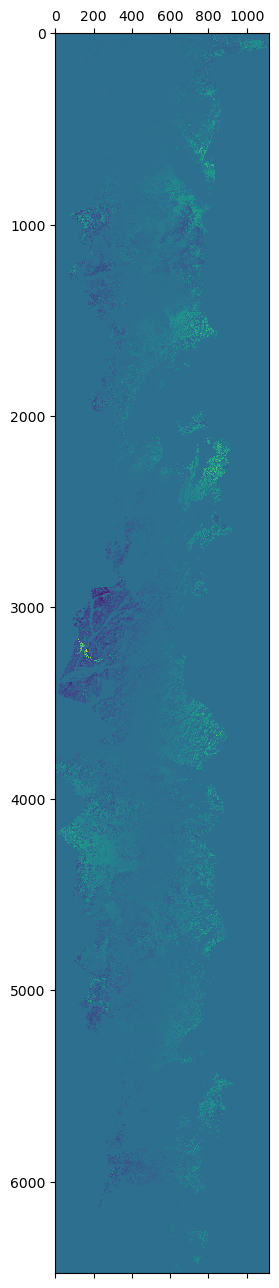

In [47]:
difference = envi.get_wave(1450) - og_envi.get_wave(1450)
plt.matshow(difference)

In [58]:
outwaves = [x for x in range(450,2500,25)]
envi.resampler = {'type': 'cubic','out_waves' :outwaves}

In [61]:
original = envi.get_pixels([100],[100])
resample = envi.get_pixels([100],[100], resample = True)

plt.plot(envi.wavelengths,original[0])
plt.plot(outwaves,resample[0])
plt.ylim(0,.6)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 426